In [8]:
import scipy.io
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

In [2]:
def get_axis(file):
    values = []
    mat = scipy.io.loadmat(file)
    a = mat['gt']
    b = [ i for i in a]
    for i in b:
        c = {
            'x': i[1],
            'y': i[3],
            'val' :i[4]
        }
        
        values.append(c)
            
    
    return values
    
    
    

In [9]:
def load_image(path ):
    
    img = Image.open(path)
    plt.imshow(img)
    color = (255,0,0)
    thickness = 2
    draw = ImageDraw.Draw(img)
    return img, color, thickness, draw

In [10]:
def draw_line(file, path):
    a= get_axis(file)
    img , color , thickness, draw = load_image(path)
    for i in range(len(a)):
        for j in range(1, len(a[i]['x'][0])):
        
            x_start = a[i]['x'][0][j-1]
            y_start = a[i]['y'][0][j-1]
            x_end = a[i]['x'][0][j]
            y_end = a[i]['y'][0][j]
            
            start = (x_start, y_start)
            end = (x_end, y_end)
            draw.line([start, end], fill= color, width=thickness)
        
        sta = (a[i]['x'][0][0], a[i]['y'][0][0])
        end = (a[i]['x'][0][-1], a[i]['y'][0][-1])
        draw.line([end, sta], fill= color, width=thickness)
        
                
    
    
    return img
    
    

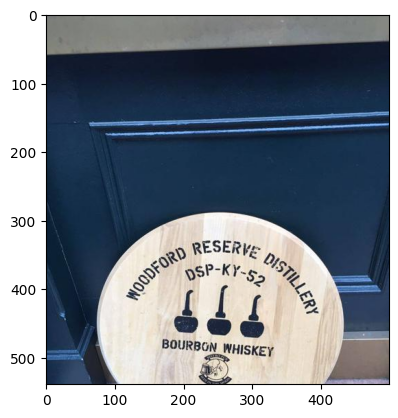

In [14]:
mat_dir = "text-reco/TT_new_train_GT/Train/gt_img12.mat"
img_path = "text-reco/totaltext/Images/Train/img12.jpg"

a = draw_line(mat_dir, img_path)


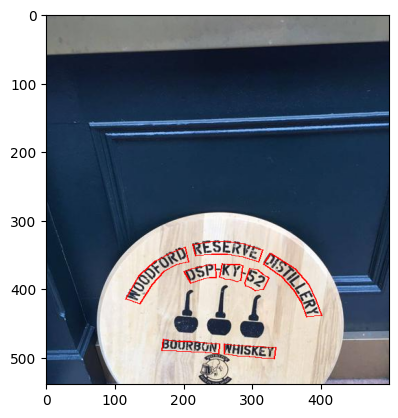

In [15]:
plt.imshow(a)